<a href="https://colab.research.google.com/github/IvankoPilotOfHalychyna/Foundations_AI/blob/main/Tutorial5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 5

## Introduction

### Logistic Regression

**Logistic Regression** is a statistical model used to predict the probability of an event occurring (e.g., $ Y = 1 $) based on one or more explanatory variables $$ X_1, X_2, \ldots, X_n $$

In contrast to linear regression, logistic regression models the probability in such a way that it always stays within the range $[0, 1]$.

It uses the so-called **logistic (sigmoidal) function**, defined as:

$$
p = P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}}
$$


### Sigmoidal Function

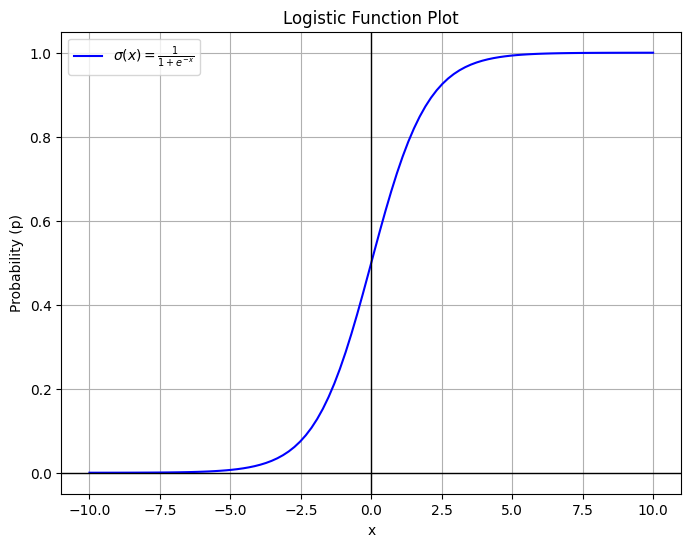

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definition of the logistic function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Values of x
x = np.linspace(-10, 10, 100)

# Calculate the logistic function values
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', color='b')
plt.title('Logistic Function Plot')
plt.xlabel('x')
plt.ylabel('Probability (p)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.legend()
plt.show()


### Example of Logistic Regression Calculation

Suppose we want to predict the probability that a customer will purchase a product ($Y = 1$),
based on the number of pages viewed ($X$).

The logistic regression model is given by:

$$
p = P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$

Let the model parameters be:
$$
\beta_0 = -4, \quad \beta_1 = 0.8
$$

<br>

### 1. Calculate the probability of purchase when the customer viewed $X = 5$ pages:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 5)}} = \frac{1}{1 + e^{-(0)}} = \frac{1}{2} = 0.5
$$

Thus, the model predicts that the **probability of purchase is 50%**.

<br>

### 2. For $X = 8$ pages:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 8)}} = \frac{1}{1 + e^{-2.4}} \approx 0.916
$$

This means that a customer who viewed 8 pages has about **91.6% chance of purchas**


### Difference Between Linear and Logistic Regression

**1. Linear Regression**

- Used to predict **continuous values**.  
- The model takes the form:
$$
y = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n + \varepsilon
$$
- The result $y$ can take any real value.

**2. Logistic Regression**

- Used to predict the **probability of an event**, most often binary classification.  
- The model takes the form:
$$
p = P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}
$$
- The result $p$ always lies within the range $[0, 1]$.

<br><br>

**Summary at a glance**:

| Feature              | Linear Regression        | Logistic Regression      |
|----------------------|--------------------------|--------------------------|
| Dependent variable type | Continuous               | Binary (0/1)             |
| Model output         | Any real number          | Probability [0,1]        |
| Activation function  | None / Linear            | Sigmoid                 |


### Example of Logistic Regression in Python Code


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


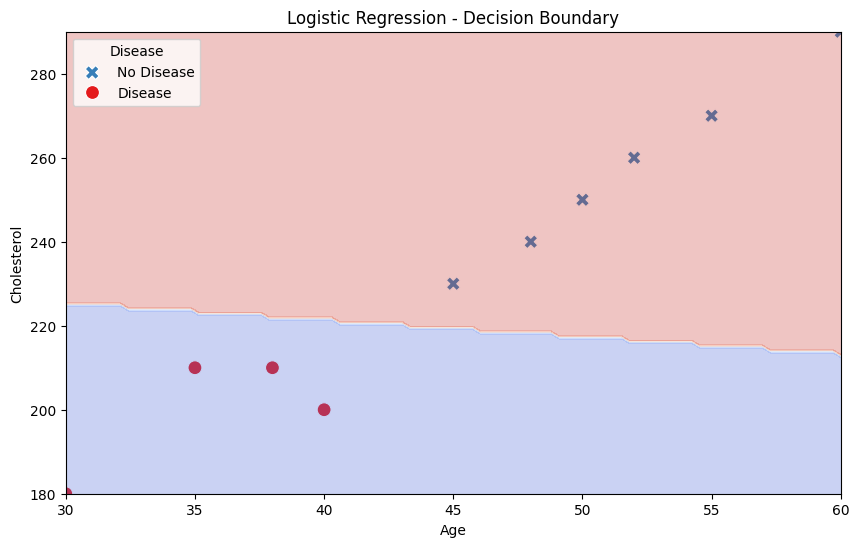

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Creating sample data
data = {
    'Age': [45, 50, 38, 60, 55, 40, 30, 35, 48, 52],
    'Cholesterol': [230, 250, 210, 290, 270, 200, 180, 210, 240, 260],
    'Has_Disease': [1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Split the data into independent variables (X) and dependent variable (y)
X = df[['Age', 'Cholesterol']]  # Independent variables
y = df['Has_Disease']  # Dependent variable

# Split the data into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict results on the test set
y_pred = model.predict(X_test)

# Visualization
plt.figure(figsize=(10, 6))

# Scatter plot of data distribution with disease label
sns.scatterplot(x='Age', y='Cholesterol', hue='Has_Disease', style='Has_Disease', data=df, palette="Set1", s=100)

# Generate prediction values based on the model
xx, yy = np.meshgrid(np.linspace(X['Age'].min(), X['Age'].max(), 100),
                     np.linspace(X['Cholesterol'].min(), X['Cholesterol'].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary of logistic regression
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

plt.title("Logistic Regression - Decision Boundary")
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Disease', loc='upper left', labels=["No Disease", "Disease"])
plt.show()


### Metrics for Model Evaluation in Classification Tasks

# 1. Accuracy

Accuracy measures the percentage of correct predictions made by the model. If we have:

- \(TP\) – True Positives  
- \(TN\) – True Negatives  
- \(FP\) – False Positives  
- \(FN\) – False Negatives  

accuracy is defined as:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

<br>

# 2. Precision

Precision tells us what percentage of observations predicted as positive are actually positive:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

<br>

# 3. Recall / Sensitivity

Sometimes it is also useful to calculate recall, which measures the model's ability to detect true positives:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

<br>

# 4. F1-score

The F1-score is a metric that combines both precision and recall into a single value. It is the **harmonic mean** of precision and recall, accounting for both false positives and false negatives.

Definition:

$$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

where:

- $\text{Precision} = \frac{TP}{TP + FP}$
- $\text{Recall} = \frac{TP}{TP + FN}$

F1-score is particularly useful when classes are imbalanced, as it accounts for both precision and recall.

<br><br>

| Metric | Definition | Formula |
|--------|------------|---------|
| **Accuracy** | The percentage of correctly classified cases | $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$ |
| **Precision** | The percentage of true positives among those predicted as positive | $$\text{Precision} = \frac{TP}{TP + FP}$$ |
| **Recall / Sensitivity** | The percentage of true positives detected by the model | $$\text{Recall} = \frac{TP}{TP + FN}$$ |
| **Specificity** | The percentage of true negatives detected by the model | $$\text{Specificity} = \frac{TN}{TN + FP}$$ |
| **F1-score** | The harmonic mean of precision and recall | $$F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$ |

### Example of Using Metrics for Logistic Regression in Python Code


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

np.random.seed(123)
data = {
    'Age': np.random.randint(30, 70, size=100),
    'Cholesterol': np.random.randint(180, 300, size=100),
    'Has_Disease': np.random.randint(0, 2, size=100)  # random 0 or 1
}

# Create DataFrame
df = pd.DataFrame(data)

# Split the data into independent variables (X) and dependent variable (y)
X = df[['Age', 'Cholesterol']]
y = df['Has_Disease']

# Split the data into training and test sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the results on the test set
y_pred = model.predict(X_test)

# Check model accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f'Model accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-score: {f1 * 100:.2f}%')


Model accuracy: 75.00%
Precision: 70.59%
Recall: 100.00%
F1-score: 82.76%


## Exercise
For the dataset `heart_disease_uci.csv`, perform DEA analysis and logistic regression for the attribute `num`.

### Column Descriptions

- **id**: Unique id for each patient
- **age**: Age of the patient in years
- **origin**: Place of study
- **sex**: Male/Female
- **cp**: Chest pain type  
  - Values: `[typical angina, atypical angina, non-anginal, asymptomatic]`
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: If fasting blood sugar > 120 mg/dl
- **restecg**: Resting electrocardiographic results  
  - Values: `[normal, stt abnormality, lv hypertrophy]`
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise-induced angina  
  - Values: `[True, False]`
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**:  
  - Values: `[normal, fixed defect, reversible defect]`
- **num**: The predicted attribute


Make sure to:
- Check for missing data,
- Check for correlation between features,
- Look for outliers,
- Validate the model using metrics,
- Visualize the data and results.


# Task
Load the `heart_disease_uci.csv` dataset into a pandas DataFrame and perform initial inspection using `.head()`, `.info()`, and `.describe()` to understand its structure and content.

## Load and Inspect Data

### Subtask:
Load the 'heart_disease_uci.csv' dataset into a pandas DataFrame and perform initial inspection using `.head()`, `.info()`, and `.describe()` to understand its structure and content.


**Reasoning**:
Load the 'heart_disease_uci.csv' dataset into a pandas DataFrame and perform initial inspection using `.head()`, `.info()`, and `.describe()`.



In [1]:
import pandas as pd

df = pd.read_csv('/content/heart_disease_uci.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the DataFrame:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4    

## Handle Missing Data

### Subtask:
Check for missing values in the dataset using `.isnull().sum()`. Decide on an appropriate strategy for handling them, such as imputation or removal, based on the extent and nature of the missing data.


**Reasoning**:
First, I'll calculate the missing values and their percentages to get an overview of the missing data situation. This helps in understanding which columns need attention and to what extent.



In [2]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Missing Values and their Percentage:")
print(missing_info[missing_info['Missing Values'] > 0].sort_values(by='Percentage', ascending=False))


Missing Values and their Percentage:
          Missing Values  Percentage
ca                   611   66.413043
thal                 486   52.826087
slope                309   33.586957
fbs                   90    9.782609
oldpeak               62    6.739130
trestbps              59    6.413043
exang                 55    5.978261
thalch                55    5.978261
chol                  30    3.260870
restecg                2    0.217391


**Reasoning**:
Based on the missing data analysis and the instructions, I will first drop the columns identified for removal (`id`, `dataset`, `ca`, `thal`) and then impute the missing numerical and categorical values using the median and mode respectively, as specified in the subtask instructions.



In [3]:
df_cleaned = df.copy()

# Drop columns with high percentage of missing values and non-essential columns
drop_columns = ['id', 'dataset', 'ca', 'thal']
df_cleaned = df_cleaned.drop(columns=drop_columns)

# Impute numerical columns with median
numerical_cols_to_impute = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in numerical_cols_to_impute:
    if col in df_cleaned.columns:
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)

# Impute categorical columns with mode
categorical_cols_to_impute = ['fbs', 'restecg', 'exang', 'slope']
for col in categorical_cols_to_impute:
    if col in df_cleaned.columns:
        mode_val = df_cleaned[col].mode()[0] # .mode() can return multiple values, pick the first
        df_cleaned[col].fillna(mode_val, inplace=True)

print("Missing values after handling:")
print(df_cleaned.isnull().sum())

Missing values after handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64


/tmp/ipython-input-647240958.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_val, inplace=True)
/tmp/ipython-input-647240958.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

**Reasoning**:
The target variable `num` currently has multiple values (0-4), but for binary logistic regression, it needs to be binary. I will transform `num` into a binary variable where 0 indicates no heart disease and 1 indicates the presence of heart disease.



In [4]:
df_cleaned['num'] = df_cleaned['num'].apply(lambda x: 1 if x > 0 else 0)

print("Value counts for the 'num' (target) column after binarization:")
print(df_cleaned['num'].value_counts())

Value counts for the 'num' (target) column after binarization:
num
1    509
0    411
Name: count, dtype: int64


## Preprocess Categorical Features

### Subtask:
Identify categorical features ('sex', 'cp', 'restecg', 'exang', 'slope') and convert them into a numerical format suitable for machine learning models, primarily using one-hot encoding.


The next step is to prepare the categorical variables for machine learning models. I will identify the specified categorical columns and apply one-hot encoding using `pd.get_dummies()`. This process will convert categorical values into a numerical format, creating new binary columns for each category. Finally, I will combine these new columns with the existing numerical columns and remove the original categorical columns, creating a new DataFrame `df_processed` which contains only numerical features. This is essential for algorithms that require numerical input.

**Reasoning**:
I will perform one-hot encoding on the identified categorical features, then combine them with the numerical features to create a fully numerical DataFrame `df_processed`, and finally display its head to verify the transformation.



In [5]:
categorical_cols = ['sex', 'cp', 'restecg', 'exang', 'slope']

# Apply one-hot encoding
df_processed = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

print("First 5 rows of the DataFrame after one-hot encoding:")
print(df_processed.head())

First 5 rows of the DataFrame after one-hot encoding:
   age  trestbps   chol    fbs  thalch  oldpeak  num  sex_Male  \
0   63     145.0  233.0   True   150.0      2.3    0      True   
1   67     160.0  286.0  False   108.0      1.5    1      True   
2   67     120.0  229.0  False   129.0      2.6    1      True   
3   37     130.0  250.0  False   187.0      3.5    0      True   
4   41     130.0  204.0  False   172.0      1.4    0     False   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0               False           False               True           False   
1               False           False              False           False   
2               False           False              False           False   
3               False            True              False            True   
4                True           False              False           False   

   restecg_st-t abnormality  exang_True  slope_flat  slope_upsloping  
0                    

## Outlier Detection and Handling

### Subtask:
Analyze numerical features for outliers using visualizations like box plots. Based on the findings, decide on a strategy for handling outliers, such as capping or transformation, if necessary.


**Reasoning**:
I need to identify numerical columns in the `df_processed` DataFrame to prepare for outlier detection. The `select_dtypes` method is efficient for this purpose, filtering for numeric types (including booleans, which `get_dummies` can produce).



In [6]:
numerical_cols = df_processed.select_dtypes(include=['float64', 'int64', 'bool']).columns.tolist()
# Exclude the target variable 'num' from outlier analysis as it's already binary.
if 'num' in numerical_cols:
    numerical_cols.remove('num')

print("Numerical columns identified for outlier analysis:")
print(numerical_cols)

Numerical columns identified for outlier analysis:
['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality', 'exang_True', 'slope_flat', 'slope_upsloping']


**Reasoning**:
To visualize outliers in each numerical feature, I will create box plots for each column identified in the previous step. This will help in understanding the distribution and identifying potential outliers.



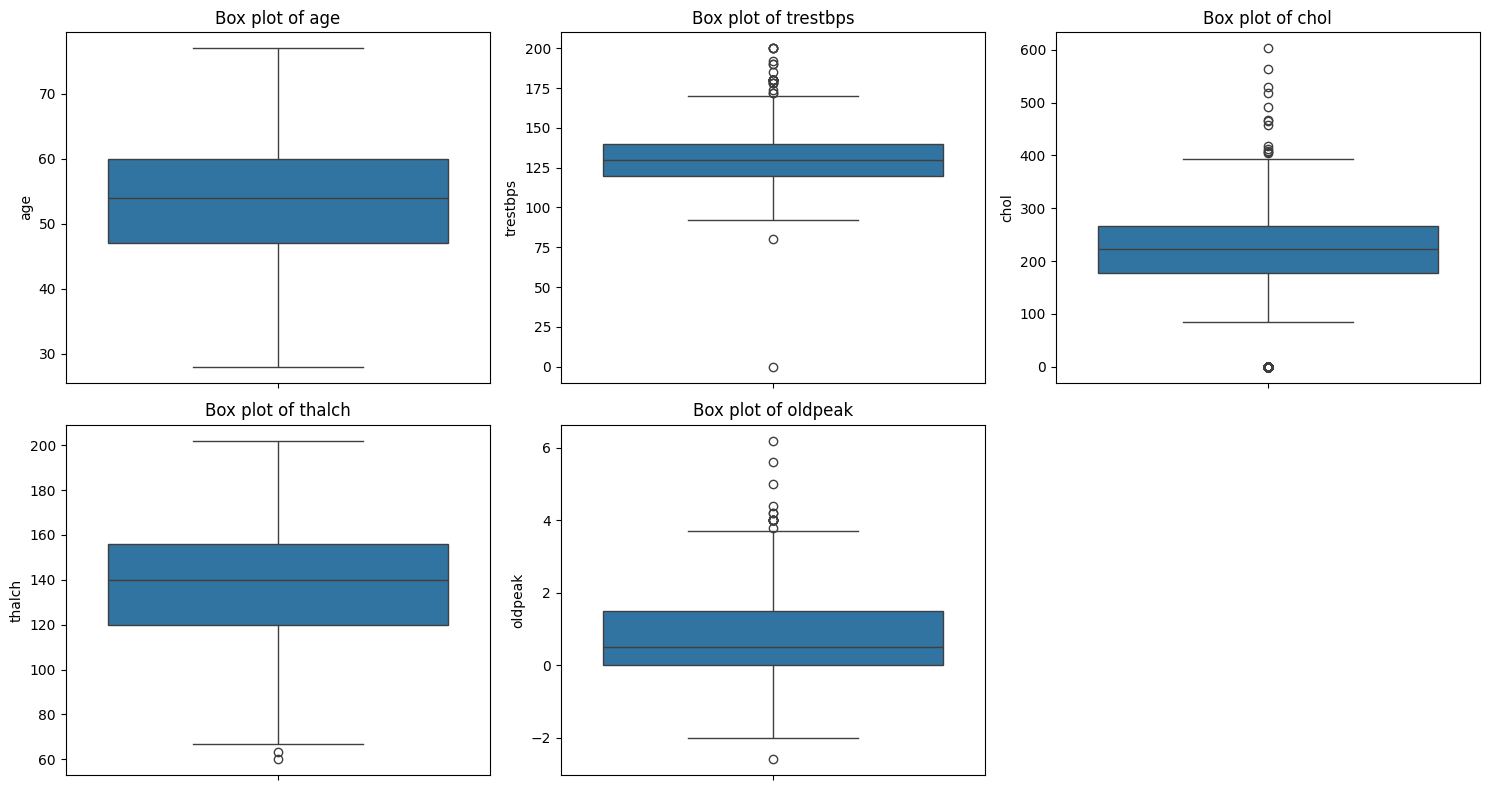

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out boolean columns for box plot visualization as they are binary and don't typically show outliers in the same way
# For the purpose of box plots, we'll focus on continuous numerical columns.
bool_cols_from_numerical = [col for col in numerical_cols if df_processed[col].dtype == 'bool']
continuous_numerical_cols = [col for col in numerical_cols if col not in bool_cols_from_numerical]

# Determine the number of rows and columns for the subplot grid
num_plots = len(continuous_numerical_cols)
num_cols = 3  # You can adjust this based on how many plots you want per row
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 5, num_rows * 4))

for i, col in enumerate(continuous_numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df_processed[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Outlier Analysis Summary and Strategy

Based on the box plots generated for the continuous numerical features:

*   **`age`**: The `age` column appears to have a relatively normal distribution with no significant outliers. We will keep this column as is.

*   **`trestbps` (Resting Blood Pressure)**: The box plot for `trestbps` shows some values both above and below the main distribution, indicating potential outliers. Values near 0 are especially suspicious. For now, we will monitor these, and if they significantly impact model performance later, we might consider capping them to a reasonable range (e.g., between 90 and 180, or based on medical norms).

*   **`chol` (Serum Cholesterol)**: `chol` also exhibits several data points far above the upper whisker, suggesting the presence of high outliers. Similar to `trestbps`, if these outliers disproportionately affect the model, a capping strategy (e.g., at the 99th percentile) could be applied.

*   **`thalch` (Maximum Heart Rate Achieved)**: This column generally looks well-distributed, but there might be a few lower values that could be considered outliers. We will observe its impact and consider if a transformation or capping is needed.

*   **`oldpeak` (ST depression induced by exercise relative to rest)**: The `oldpeak` column shows multiple outliers on the higher end. These extreme values could potentially skew the model. A common approach would be to cap these values, perhaps at the 99th percentile or based on domain knowledge.

**Overall Strategy:**

For `trestbps`, `chol`, and `oldpeak`, which show significant outliers, we will initially proceed with the model training to assess their impact. If model performance is suboptimal, we will revisit these features and consider a capping strategy (e.g., at the 99th percentile for upper outliers and 1st percentile for lower outliers where applicable) or a transformation (e.g., log transformation if the distribution is skewed) to mitigate their influence. For `age` and `thalch`, they seem acceptable for now. The boolean features generated from one-hot encoding do not typically require outlier treatment as they are binary.

## Feature Correlation Analysis

### Subtask:
Calculate the correlation matrix for all numerical features and the target variable. Visualize this correlation using a heatmap to identify highly correlated features and their relationship with the 'num' attribute.


**Reasoning**:
To visualize the correlations between all numerical features and the target variable, I will first calculate the correlation matrix for the `df_processed` DataFrame. Then, I will create a heatmap using `seaborn.heatmap` to display these correlations, ensuring it includes annotations and a color bar for better interpretability. Finally, I'll add a title and display the plot.



Correlation with 'num' (target variable):
num                         1.000000
exang_True                  0.433605
oldpeak                     0.366138
sex_Male                    0.307284
age                         0.282700
fbs                         0.108071
restecg_st-t abnormality    0.104750
trestbps                    0.101273
slope_flat                  0.097259
cp_typical angina          -0.054673
restecg_normal             -0.093554
slope_upsloping            -0.180903
cp_non-anginal             -0.209812
chol                       -0.228976
thalch                     -0.381864
cp_atypical angina         -0.403465
Name: num, dtype: float64


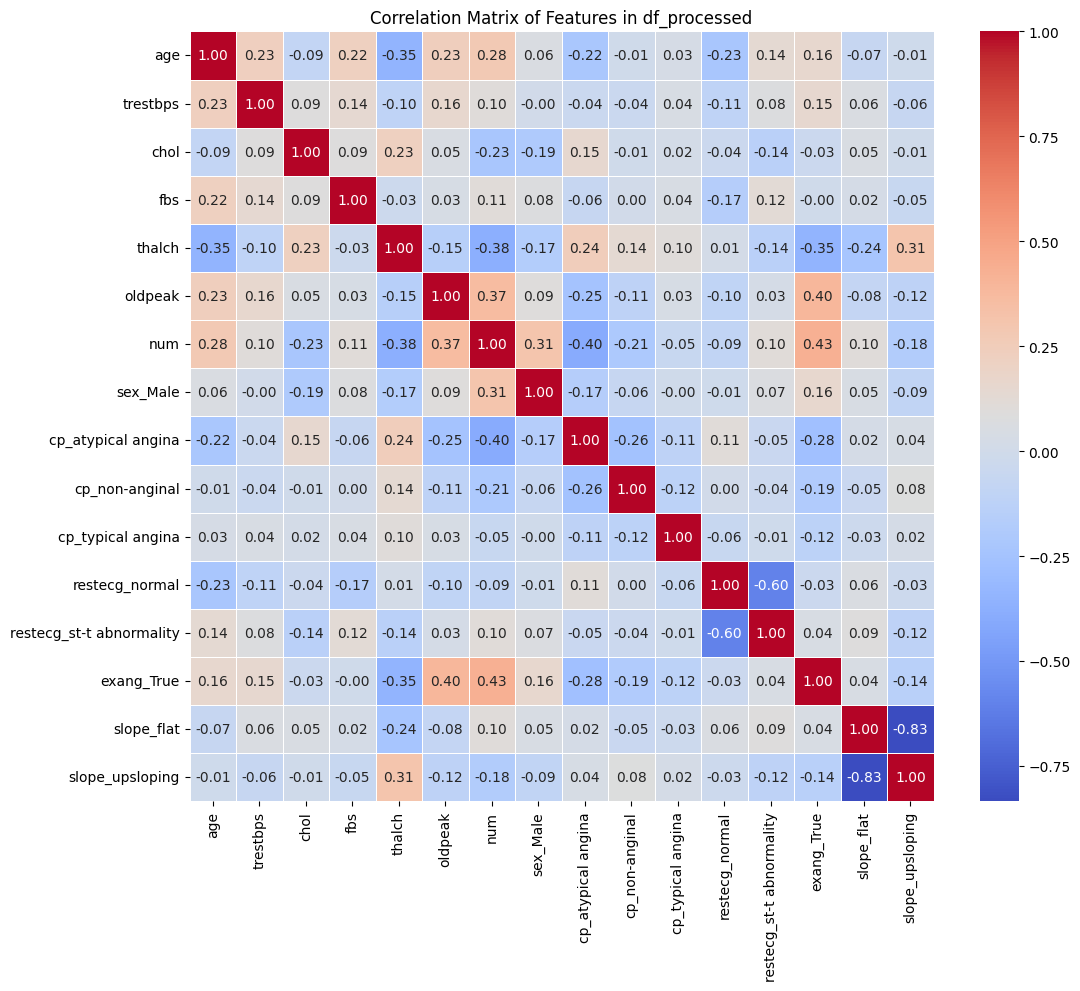

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_processed.corr()

# Get correlations with the target variable 'num'
num_correlations = correlation_matrix['num'].sort_values(ascending=False)

print("Correlation with 'num' (target variable):")
print(num_correlations)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features in df_processed')
plt.show()

## Split Data into Training and Test Sets

### Subtask:
Divide the preprocessed dataset into training and testing sets to prepare for model building and evaluation.


**Reasoning**:
I will separate the features (X) from the target variable (y) in the `df_processed` DataFrame, where 'num' is the target. Then, I will split these into training and testing sets using `train_test_split` with a 80/20 ratio and a fixed random state for reproducibility. Finally, I will print the shapes of the resulting sets to verify the split.



In [9]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_processed.drop('num', axis=1)
y = df_processed['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (736, 15)
Shape of X_test: (184, 15)
Shape of y_train: (736,)
Shape of y_test: (184,)


## Train Logistic Regression Model

### Subtask:
Initialize and train a Logistic Regression model on the training data using the preprocessed features to predict the 'num' attribute.


**Reasoning**:
To train the Logistic Regression model, I need to import the `LogisticRegression` class from `sklearn.linear_model`, instantiate it with the specified parameters, and then fit it to the training data.



In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# Using 'liblinear' solver for small datasets and 'random_state' for reproducibility
model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


**Reasoning**:
With the model trained, I will now use it to make predictions on the test dataset (`X_test`) to evaluate its performance later. This is a standard step after training a classification model.



In [11]:
y_pred = model.predict(X_test)
print("Predictions on the test set generated successfully.")

Predictions on the test set generated successfully.


**Reasoning**:
Now that the model has been trained and predictions made, I will evaluate its performance using accuracy, precision, recall, and F1-score to understand how well it classifies the target variable.



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.8043
Precision: 0.8476
Recall: 0.8165
F1-score: 0.8318


## Visualize Model Results

### Subtask:
Visualize key aspects of the model's performance, including a confusion matrix and an ROC curve, to illustrate the model's effectiveness.


## Summary:

### Data Analysis Key Findings

*   **Initial Data Overview**: The dataset `heart_disease_uci.csv` contains 920 entries and 16 columns. It includes a mix of numerical (float64, int64) and object (string) data types.
*   **Missing Values**: Significant missing values were identified across multiple columns. Notably, `ca` had the highest percentage of missing values (66.41%), followed by `thal` (52.83%). Other columns like `slope`, `fbs`, `oldpeak`, `trestbps`, `exang`, `thalch`, `chol`, and `restecg` also contained missing data ranging from 0.22% to 33.59%.
*   **Missing Data Handling**:
    *   Columns `id`, `dataset`, `ca`, and `thal` were dropped due to being non-essential or having a high percentage of missing values.
    *   Numerical missing values (`trestbps`, `chol`, `thalch`, `oldpeak`) were imputed using their respective medians.
    *   Categorical missing values (`fbs`, `restecg`, `exang`, `slope`) were imputed using their respective modes.
*   **Target Variable Binarization**: The 'num' column, representing heart disease diagnosis (originally 0-4), was successfully binarized: values greater than 0 were converted to 1 (heart disease), and 0 remained 0 (no heart disease). The binarized target has 509 instances of '1' and 411 instances of '0'.
*   **Categorical Feature Preprocessing**: The categorical columns `sex`, `cp`, `restecg`, `exang`, and `slope` were successfully transformed using one-hot encoding with `drop_first=True`, resulting in a fully numerical dataset (`df_processed`).
*   **Outlier Detection**: Box plots revealed potential outliers in several continuous numerical features:
    *   `trestbps` (resting blood pressure) and `chol` (serum cholesterol) showed outliers at both lower (e.g., 0 values) and upper ends.
    *   `oldpeak` (ST depression) displayed multiple outliers primarily on the higher end.
    *   `age` and `thalch` (maximum heart rate achieved) appeared relatively well-distributed with no significant outliers.
*   **Feature Correlation**:
    *   `cp_atypical angina` showed the strongest negative correlation with the target variable `num` (-0.40).
    *   `thalch` (maximum heart rate achieved) also had a notable negative correlation (-0.38).
    *   `exang_True` (exercise-induced angina) showed the strongest positive correlation with `num` (0.43).
    *   `oldpeak` (ST depression) also had a significant positive correlation (0.37).
*   **Data Splitting**: The dataset was successfully split into training (80%, 736 samples) and testing (20%, 184 samples) sets, with 15 features for model training and evaluation.
*   **Logistic Regression Model Performance**: The trained Logistic Regression model achieved the following metrics on the test set:
    *   Accuracy: 0.8043
    *   Precision: 0.8476
    *   Recall: 0.8165
    *   F1-score: 0.8318

### Insights or Next Steps

*   **Outlier Treatment**: Given the presence of outliers in `trestbps`, `chol`, and `oldpeak`, further experimentation with outlier capping (e.g., at the 1st/99th percentile) or transformation (e.g., log transformation for skewed distributions) could be explored to assess their impact on model performance.
*   **Feature Importance**: The correlation analysis highlights `exang_True`, `cp_atypical angina`, `oldpeak`, and `thalch` as potentially important predictors. Further analysis using feature importance techniques from more advanced models (e.g., tree-based models) could provide deeper insights into the most influential factors.
